In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from typing import List
from typing import Tuple
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

df = pd.read_csv('processed.cleveland.data')
df


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [50]:
df.columns

Index(['63.0', '1.0', '1.0.1', '145.0', '233.0', '1.0.2', '2.0', '150.0',
       '0.0', '2.3', '3.0', '0.0.1', '6.0', '0'],
      dtype='object')

In [ ]:
#1
#Inductive reasoning is finding a conclusion by beginning with something very specific and then get to something more general.
#Ex:Deciding what to wear. And taking into account where you are going, what kind of environment it is, and what type of weather is outside.
#Deductive reasoning is coming up with a solution using general knowledge and common sense. 
#Ex:Companies have workers. Nike is a company. Nike has workers.

In [51]:
#2.
def preprocess_data(df: pd.DataFrame, column_names: List[str]) -> pd.DataFrame:

    df.columns = column_names

    df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
    df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

    df['ca'] = df['ca'].fillna(df['ca'].median())
    df['thal'] = df['thal'].fillna(df['thal'].median())

    df['num'] = np.where(df['num'] >= 2, 1, df['num'])

    return df

column_names = ["age", "sex", "cp",	"trestbps",	"chol",	"fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca",	"thal",	"num"]

df = preprocess_data(df, column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [52]:
#3
def train_and_evaluate_model(df: pd.DataFrame) -> Tuple[str, DecisionTreeClassifier]:
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = DecisionTreeClassifier(
        class_weight='balanced',
        max_features=10, 
        splitter='best',  
        max_depth=7, 
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report, model
report, model = train_and_evaluate_model(df)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.80      0.81      0.80        43

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
# The 3 variables that I changed were the class weight, splitter, and max depth. Class weight is set to balanced, 
# allowing the model to oversample the minority class so it can better predict an instance of the 
# minority class. Splitter is set to best, so that the model can make the optimal split at each node 
# for better fitting. Max depth was set to 7 so that the model doesn't overfit to the data and make 
# better general predictions about the dataset.

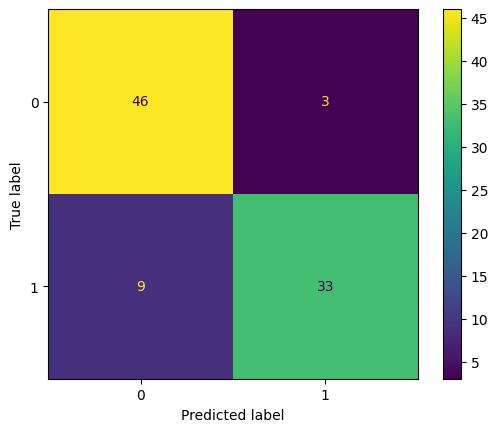

In [ ]:
#4
def train_and_evaluate_rf_model(df: pd.DataFrame) -> Tuple[float, RandomForestClassifier]:
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    rf = RandomForestClassifier(
        n_estimators=300,         
        max_depth=12,            
        min_samples_split=3,      
        min_samples_leaf=1,       
        class_weight='balanced', 
        random_state=42
    )
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
    return score, rf
score, rf = train_and_evaluate_rf_model(df)

In [ ]:
#Recall
35/(35+7)
# The n_estimators=300 increases the number of decision trees, which generally improves how well
# the model will predict. Limiting max_depth to 12 prevents trees from growing excessively deep, this
# helps avoid overfitting and helps the model to generalize better. Setting min_samples_split=3 requires at least three samples to create a split, 
# reducing overly specific splits and promoting better generalization. With min_samples_leaf=1, each 
# leaf node contains at least one sample, maintaining flexibility in how nodes are split. 

0.8333333333333334

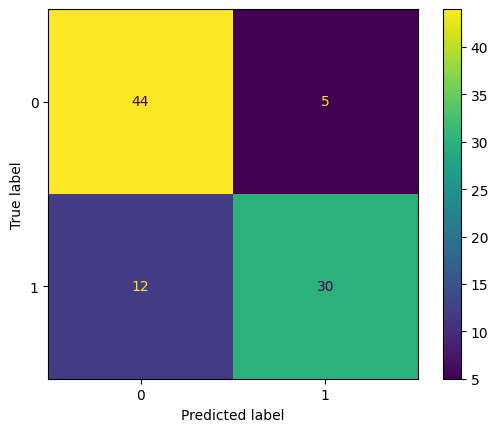

In [ ]:
#5
def train_and_evaluate_xgb_model(df: pd.DataFrame) -> Tuple[XGBClassifier, pd.Series]:
    X = df.drop('num', axis=1)
    y = df['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    xgb = XGBClassifier(
        n_estimators=300,          
        max_depth=10,
        gamma=1
    )
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
    return xgb, y_pred
xgb, y_pred = train_and_evaluate_xgb_model(df)

In [53]:
#Recall
30/(30+12)

0.7142857142857143

In [ ]:
# Same as the other ones except there is a new gamma parameter. It punishes the model whenever 
# it makes a split and only improves the accuracy by a small margin, to limit the samples more 
# organically and let the model decide what is the optimal depth.